# Machine Learning - Supervised Learning - Regression

[Simone Lombardini](https://sites.google.com/view/simone-lombardini/home-page) - 16 April 2020

**Data:** SZEGD weather dataset, from Kaggle (https://www.kaggle.com/budincsevity/szeged-weather)

**Task:** Predict the level of humidity given all the other parameters in the dataset

**Type of exercise:** Supervised Learning (Regression)

**Perfromance Measure:** Root Mean Square Error (RMSE)

**Short Description:** 

The programme will:
* explore and visualise data
* clean and pre-processing data 
* training three differnt machine learning algorithms 
* conduct performance evaluation for each model
* fine-tune parameters of the most performing model 
* evaluate on a test set of the performance of the best model

**Algorithms tested:** LinearRegression, Stocastic Gradient Descent, Decision Tree, Random Forest 

## 1) Import libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import time

# Graphs
import matplotlib.pyplot as plt
from scipy import stats

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Fine-Tue
from sklearn.model_selection import GridSearchCV

# Evaluate
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Precision options
np.set_printoptions(precision=2)
pd.options.display.float_format = '{:.3f}'.format

In [6]:
# Check versions
import sys
print(sys.version)
assert sys.version_info >= (3, 5)

import sklearn
print(sklearn.__version__)

import scipy
print(scipy.__version__)

3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
0.22.1
1.4.1


## 2) Open dataset

In [7]:
df = pd.read_csv('data/weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [9]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000
mean,11.933,10.855,0.735,10.811,187.509,10.347,0.000,1003.236
std,9.552,10.697,0.195,6.914,107.383,4.192,0.000,116.970
min,-21.822,-27.717,0.000,0.000,0.000,0.000,0.000,0.000
25%,4.689,2.311,0.600,5.828,116.000,8.340,0.000,1011.900
50%,12.000,12.000,0.780,9.966,180.000,10.046,0.000,1016.450
75%,18.839,18.839,0.890,14.136,290.000,14.812,0.000,1021.090
max,39.906,39.344,1.000,63.853,359.000,16.100,0.000,1046.380


## 3) Data exploration and visualization

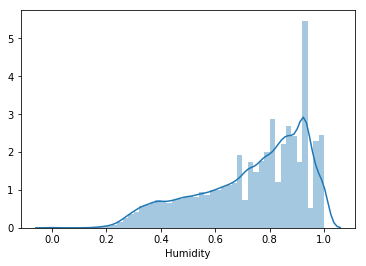

In [10]:
sns.distplot(df['Humidity'])

### 3.1 Date maniputlation

In [11]:
df['year'] = df['Formatted Date'].apply(lambda d: d[:4])
df['month'] = df['Formatted Date'].apply(lambda d: d[5:7])
df['day'] = df['Formatted Date'].apply(lambda d: d[8:10])
df['hour'] = df['Formatted Date'].apply(lambda d: d[11:13])
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,year,month,day,hour
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.,2006,04,01,00
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.,2006,04,01,01
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.,2006,04,01,02
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.,2006,04,01,03
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.,2006,04,01,04


In [12]:
df = df.drop('Formatted Date', axis=1)

### 3.2 Correlations

In [13]:
corr_matrix = df.corr()
corr_matrix["Humidity"].sort_values(ascending=False)

Humidity                    1.000
Pressure (millibars)        0.005
Wind Bearing (degrees)      0.001
Wind Speed (km/h)          -0.225
Visibility (km)            -0.369
Apparent Temperature (C)   -0.603
Temperature (C)            -0.632
Loud Cover                    nan
Name: Humidity, dtype: float64

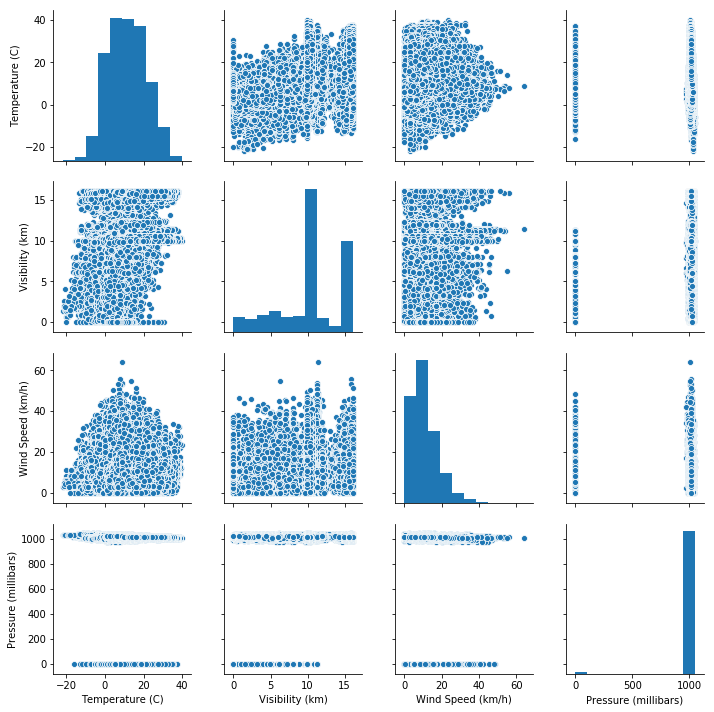

In [14]:
attributes = ["Temperature (C)", "Visibility (km)", "Wind Speed (km/h)", "Pressure (millibars)"]
ax =sns.pairplot(df[attributes])

### 3.3 Humidity by month 

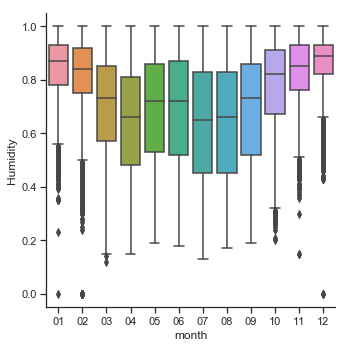

In [15]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="month", y="Humidity", kind="box", data=df);

### 3.4 Humidity by hour

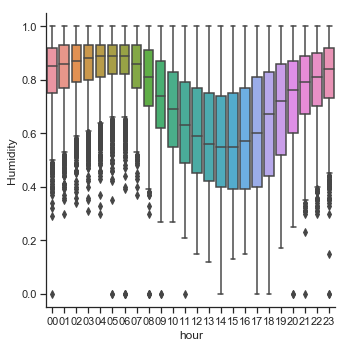

In [16]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="hour", y="Humidity", kind="box", data=df);

### 3.5 Humidity and Temperature

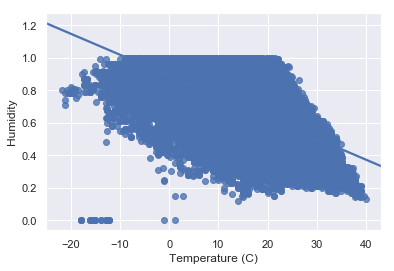

In [17]:
sns.set(color_codes=True)
sns.regplot(x="Temperature (C)", y="Humidity", data=df)

## 4) Prepare data for ML

In [18]:
X = df.drop('Humidity', axis=1)
y = df.Humidity

# Divide into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
categorical_columns = ['year', 'month', 'day', 'hour', 'Summary', 'Precip Type', 'Daily Summary']
numerical_columns = ['Temperature (C)', 'Apparent Temperature (C)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

preprocessing = ColumnTransformer([
     ('cat', categorical_pipeline, categorical_columns),
     ('num', numerical_pipeline, numerical_columns)],
     remainder='passthrough')

In [20]:
X_processed = preprocessing.fit_transform(X_train)
X_processed

<67517x328 sparse matrix of type '<class 'numpy.float64'>'
	with 877721 stored elements in Compressed Sparse Row format>

In [21]:
type(X_processed)

scipy.sparse.csr.csr_matrix

## 5) Select and train models

### Linear Regression

In [22]:
# Create linear regression object
lin_reg = LinearRegression()

In [23]:
# Train the model using the training sets
lin_reg.fit(X_processed, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# Show intercept and coeffieicents
lin_reg.intercept_, lin_reg.coef_

(0.7065010695323751,
 array([ 2.12e-02, -3.86e-02, -2.58e-02, -2.22e-02,  4.25e-02, -4.72e-03,
        -3.05e-02,  2.29e-02,  1.37e-02, -4.47e-03,  2.60e-02, -3.38e-02,
        -5.55e-02, -9.10e-02, -7.78e-02,  2.34e-02,  7.90e-02,  8.32e-02,
         7.43e-02,  3.13e-02,  7.35e-03, -1.64e-02, -2.42e-02, -9.41e-03,
        -1.56e-03, -3.56e-03,  2.51e-05,  6.70e-03,  5.08e-03,  7.30e-03,
        -3.47e-03, -3.84e-03, -8.55e-04,  4.06e-03, -1.94e-03,  1.64e-03,
        -3.33e-03,  3.35e-03,  5.58e-04, -7.98e-03,  1.20e-03,  2.81e-04,
         3.85e-03,  5.54e-03,  5.97e-03,  9.91e-03,  2.25e-03,  3.88e-03,
        -2.43e-03, -2.52e-03, -4.94e-04, -1.24e-02,  1.13e-03, -8.95e-03,
         6.49e-02,  6.86e-02,  7.20e-02,  7.49e-02,  7.83e-02,  7.64e-02,
         6.79e-02,  5.64e-02,  3.29e-02, -2.85e-04, -2.78e-02, -5.47e-02,
        -7.62e-02, -8.93e-02, -9.58e-02, -9.58e-02, -9.38e-02, -7.99e-02,
        -5.96e-02, -3.55e-02, -5.96e-03,  2.32e-02,  4.41e-02,  5.54e-02,
        -2.97e-02

In [25]:
# Make predictions using the training set
lin_reg_y_pred = lin_reg.predict(X_processed)

In [26]:
# Root Mean Squared Error (Performance Measure) on the training set
lin_mse = mean_squared_error(y_train, lin_reg_y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.10040534556091284

In [27]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", "{0:.2f}".format(scores.mean()))
    print("Standard deviation:", "{0:.2f}".format(scores.std()))

In [28]:
# K-fold cross validation 
start = time.time()
lin_reg_scores = cross_val_score(lin_reg, X_processed, y_train, scoring='neg_mean_squared_error', cv=10)
end = time.time()
print("Duration: {} s".format(end - start))   

Duration: 16.052582025527954 s


In [29]:
lin_reg_rmse_scores = np.sqrt(-lin_reg_scores)
display_scores(lin_reg_rmse_scores) 

Scores: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Mean: 0.10
Standard deviation: 0.00


### Stocastic Gradient Descent

In [30]:
# Create Stocastic Gradience Descent Object
sgd_reg = SGDRegressor()

In [31]:
# train the model on the training set
sgd_reg.fit(X_processed, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [32]:
# Make predictions using the training set
sgd_reg_y_pred = sgd_reg.predict(X_processed)

In [33]:
# Root Mean Squared Error (Performance Measure) on the training set
sgd_mse = mean_squared_error(y_train, sgd_reg_y_pred)
sgd_rmse = np.sqrt(sgd_mse)
sgd_rmse

0.10339328337692677

In [34]:
# K-fold cross validation 
start = time.time()
sgd_scores = cross_val_score(sgd_reg, X_processed, y_train, scoring='neg_mean_squared_error', cv=10)
end = time.time()
print("Duration: {} s".format(end - start))   

Duration: 1.5893926620483398 s


In [35]:
sgd_rmse_scores = np.sqrt(-sgd_scores)
display_scores(sgd_rmse_scores) 

Scores: [0.11 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1 ]
Mean: 0.10
Standard deviation: 0.00


### Decision Tree

In [36]:
# Create Decision Tree object
tree_reg = DecisionTreeRegressor()

In [37]:
# Train model on training data
tree_reg.fit(X_processed, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [38]:
# Make predictions using the training set
tree_reg_y_pred = tree_reg.predict(X_processed)

In [39]:
# Root Mean Squared Error (Performance Measure) on the training set
tree_mse = mean_squared_error(y_train, tree_reg_y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

3.383343478343298e-17

In [40]:
# K-fold cross validation 
start = time.time()
tree_scores = cross_val_score(tree_reg, X_processed, y_train, scoring='neg_mean_squared_error', cv=10)
end = time.time()
print("Duration: {} s".format(end - start))   

Duration: 291.858110666275 s


In [41]:
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores) 

Scores: [0.1  0.11 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1 ]
Mean: 0.10
Standard deviation: 0.00


### Random Forest

In [42]:
# Create random forest object
forest_regr = RandomForestRegressor()

In [43]:
# Fit model to training data
forest_regr.fit(X_processed, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [44]:
# Make predictions using the training set
forest_reg_y_pred = forest_regr.predict(X_processed)

In [45]:
# Root Mean Squared Error (Performance Measure) on the training set
forest_mse = mean_squared_error(y_train, forest_reg_y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.026305100772353242

In [46]:
# K-fold cross validation 
start = time.time()
forest_scores = cross_val_score(forest_regr, X_processed, y_train, scoring='neg_mean_squared_error', cv=10)
end = time.time()
print("Duration: {} s".format(end - start))  

Duration: 12583.264595270157 s


In [47]:
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores) 

Scores: [0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07]
Mean: 0.07
Standard deviation: 0.00


We select RandomForest because it provides the smallest score. 

## 6) Fine-Tune model

### Grid search

In [49]:
param_grid = [
    {
        'bootstrap': [True, False],
        'n_estimators': [3, 10, 30], 
        'max_features': [2, 4, 6, 8]
    }
]

In [50]:
forest_regr = RandomForestRegressor()

In [51]:
grid_search = GridSearchCV(
    forest_regr, 
    param_grid, 
    cv=5,
    scoring='neg_mean_squared_error', 
    return_train_score=True
)

In [52]:
grid_search.fit(X_processed, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [53]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 8, 'n_estimators': 30}

In [54]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## 7) Evaluate the model on the Test Set

In [55]:
final_model = grid_search.best_estimator_

In [56]:
X_test_processed = preprocessing.transform(X_test)
X_test_processed

<28936x328 sparse matrix of type '<class 'numpy.float64'>'
	with 376167 stored elements in Compressed Sparse Row format>

In [57]:
final_predications = final_model.predict(X_test_processed)

In [58]:
final_mse = mean_squared_error(y_test, final_predications)
final_rmse = np.sqrt(final_mse)
final_rmse

0.07165620443015668